# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [1]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [9]:
import pandas as pd

data = pd.read_csv('Orange_Telecom_Churn_Data.csv')

data.head(1)
data.drop(['state','area_code','phone_number'],axis=1, inplace=True)
data

account_length intl_plan voice_mail_plan  number_vmail_messages  \
0                128        no             yes                     25   
1                107        no             yes                     26   
2                137        no              no                      0   
3                 84       yes              no                      0   
4                 75       yes              no                      0   
5                118       yes              no                      0   
6                121        no             yes                     24   
7                147       yes              no                      0   
8                117        no              no                      0   
9                141       yes             yes                     37   
10                65        no              no                      0   
11                74        no              no                      0   
12               168        no              no                      0   
13                95        no              no                      0   
14                62        no              no                      0   
15               161        no              no                      0   
16                85        no             yes                     27   
17                93        no              no                      0   
18                76        no             yes                     33   
19                73        no              no                      0   
20               147        no              no                      0   
21                77        no              no                      0   
22               130        no              no                      0   
23               111        no              no                      0   
24               132        no              no                      0   
25               174        no              no                      0   
26                57        no             yes                     39   
27                54        no              no                      0   
28                20        no              no                      0   
29                49        no              no                      0   
...              ...       ...             ...                    ...   
4970             133        no              no                      0   
4971             128        no             yes                     28   
4972              81        no              no                      0   
4973              81        no              no                      0   
4974              96        no              no                      0   
4975              93        no              no                      0   
4976             145        no              no                      0   
4977              53       yes              no                      0   
4978             108        no              no                      0   
4979              52        no              no                      0   
4980              73        no              no                      0   
4981              61        no              no                      0   
4982              86        no              no                      0   
4983             137        no              no                      0   
4984              74        no              no                      0   
4985             118        no             yes                     31   
4986             125        no              no                      0   
4987             127        no             yes                     27   
4988              80        no              no                      0   
4989             150        no              no                      0   
4990             140        no              no                      0   
4991              97        no              no                      0   
4992              83        no              no                  

## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [18]:
#Binarizer
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan','voice_mail_plan','churned']:
    data[col]=lb.fit_transform(data[col])

#Interval
import warnings

warnings.filterwarnings('ignore', module='sklearn')
from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),columns=data.columns)


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [26]:
#Setting Features and Labels
x_cols = [x for x in data.columns if x != 'churned']

X_data = data[x_cols]
y_data = data['churned']

#KNN Predict
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)
y_pred

5000

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [27]:
def accuracy(real,predict):
    return sum(y_data==y_pred)/float(real.shape[0])
print(accuracy(y_data,y_pred))

0.9422


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [29]:
#Euclidean

knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
knn = knn.fit(X_data, y_data)
y_pred = knn.predict(X_data)
print(accuracy(y_data, y_pred))

1.0


In [30]:
#Manhattan
knn = KNeighborsClassifier(n_neighbors=5,p=1)
knn = knn.fit(X_data, y_data)
y_pred = knn.predict(X_data)
print(accuracy(y_data, y_pred))

0.9356


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

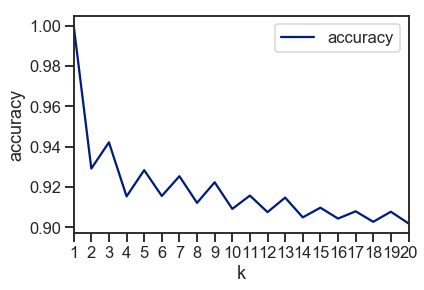

In [33]:
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

score_list = list()

for k in range(1, 21):
    knn =  KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    
    y_pred = knn.predict(X_data)
    score = accuracy(y_data, y_pred)
    score_list.append((k,score))
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = score_df.set_index('k').plot()
ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));